Conteos y proporciones

In [7]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

processed_penguins_df = pd.read_csv('./data/processed_penguins_df.csv')

Preludio: Que estadisticos describen el conjunto de datos?

Todas las variables

In [9]:
processed_penguins_df.describe(include='all')

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,173.324324,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,98.386547,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,0.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,89.000000,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.000000,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.000000,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


Solo las variables numericas

In [ ]:
processed_penguins_df.describe(include=[np.number])

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,173.324324,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,98.386547,5.468668,1.969235,14.015765,805.215802,0.812944
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,89.000000,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,172.000000,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,258.000000,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


Solo las variables categoricas - 1

In [11]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


Solo las variables categoricas - 2

In [13]:
(
  processed_penguins_df
  .astype({
    'species': 'category',
    'island': 'category',
    'sex': 'category'
  })
  .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


Como visualizar los conteos

Pandas

<Axes: xlabel='species'>

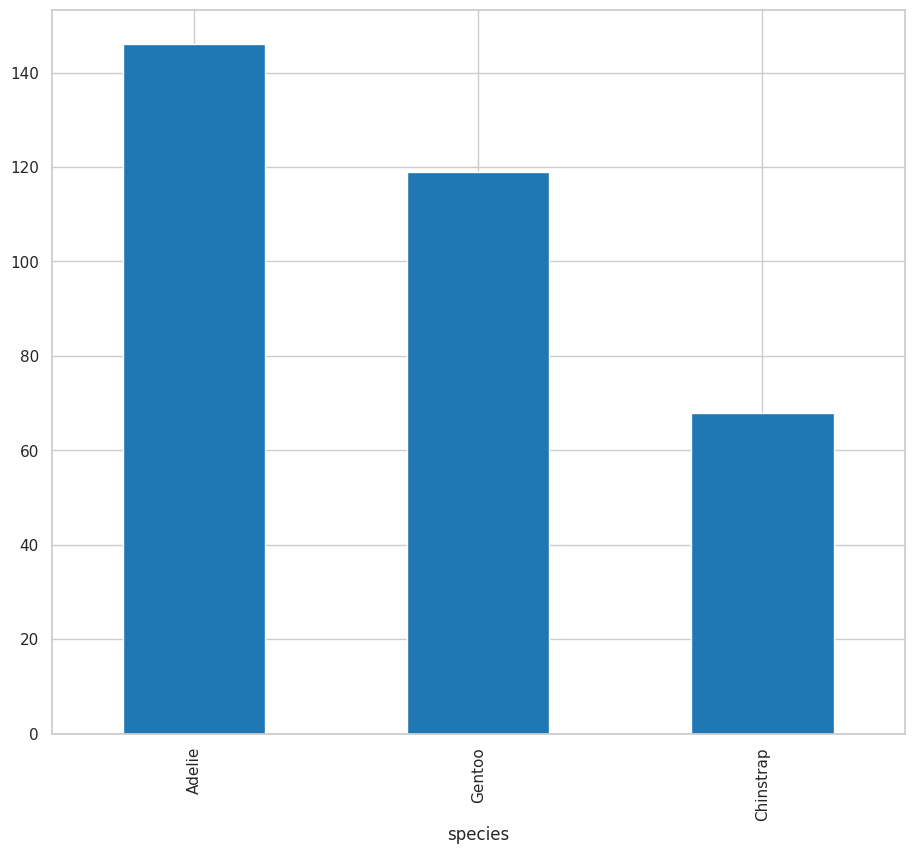

In [15]:
(
  processed_penguins_df
  .species
  .value_counts()
  .plot(kind='bar')
)

Seaborn

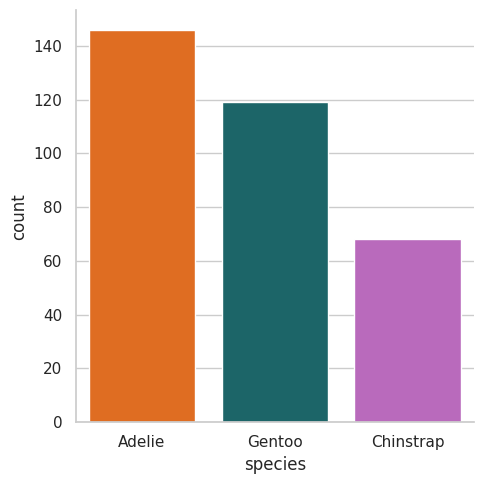

In [28]:
sns.catplot(
  data=processed_penguins_df,
  x='species',
  kind='count',
  hue='species',  # Especifica la misma variable como hue
  palette=penguin_color
)

<Axes: xlabel='species', ylabel='count'>

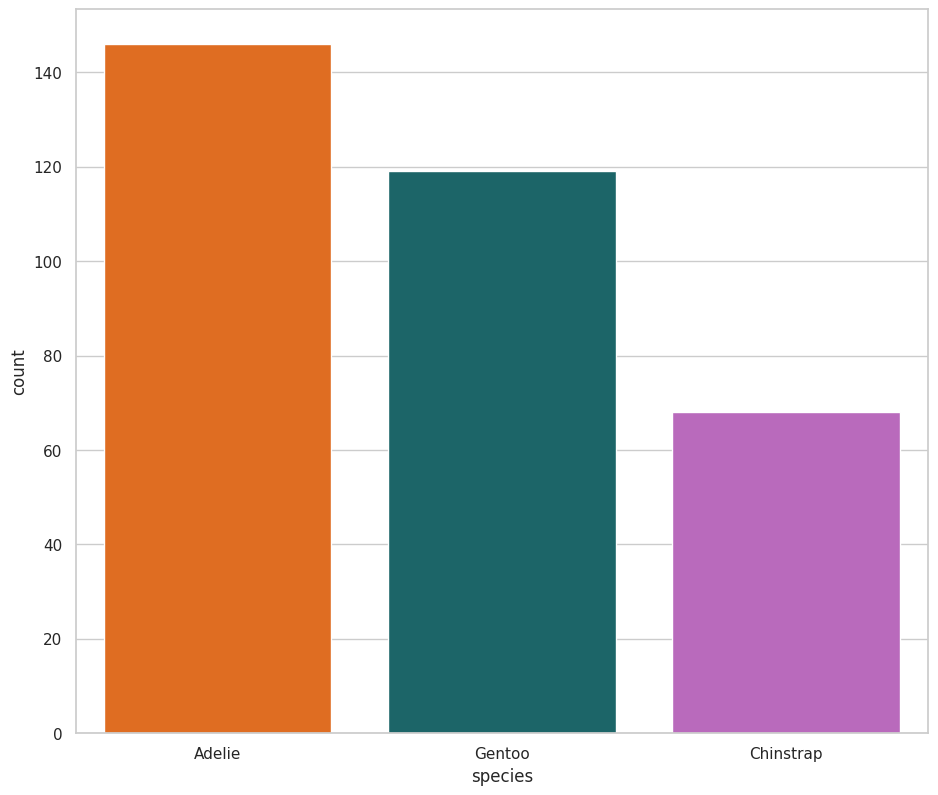

In [27]:
(
  processed_penguins_df
  .value_counts('species', sort=True)
  .reset_index(name='count')
  .pipe(
    lambda df: (
      sns.barplot(
        data=df,
        x='species',
        y='count',
        hue='species',  # Especifica la misma variable como hue
        palette=penguin_color
      )
    )
  )
)

Como visualizar las proporciones

/home/angel/MachineLearning/python_para_machine_learning/curso_analisis_exploratorio_de_datos/.venv/lib64/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


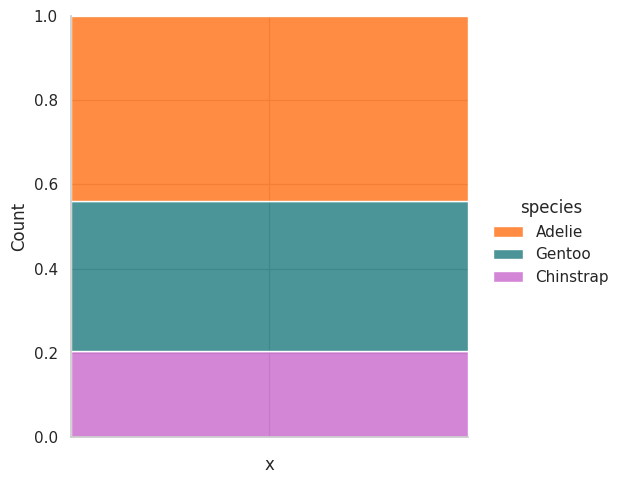

In [30]:
(
  processed_penguins_df
  .add_column('x', '')
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        x='x',
        hue='species',
        multiple='fill',
        palette=penguin_color
      )
    )
  )
)

Resumen de distribucion de pinguinos por isla y sexo

In [31]:
distribution_summary = processed_penguins_df.groupby(['island', 'sex']).size().reset_index(name='count')

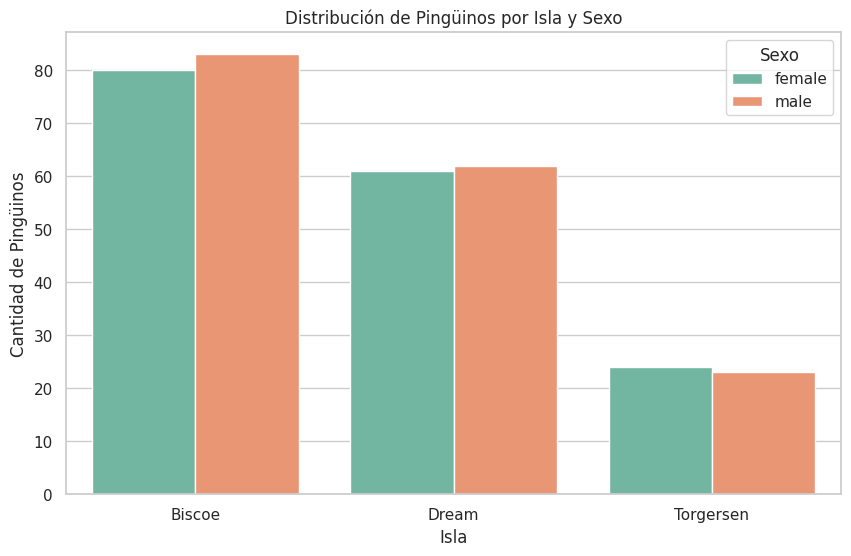

In [33]:
# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=distribution_summary,
    x='island',
    y='count',
    hue='sex',
    palette='Set2'
)

# Personalización del gráfico
plt.title('Distribución de Pingüinos por Isla y Sexo')
plt.xlabel('Isla')
plt.ylabel('Cantidad de Pingüinos')
plt.legend(title='Sexo')
plt.show()